In [5]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import logging
import tensorflow as tf
import tempfile
import os
from sklearn.metrics import accuracy_score

logging.getLogger('tensorflow').setLevel(logging.ERROR)
tf.autograph.set_verbosity(1)
np.set_printoptions(suppress=True)

tmpdir = tempfile.mkdtemp()

In [6]:
# Setup
# Data File
file =  "/home/werner/Projects/tensor_flow/tensor_data_new.csv"
# Model Name
model_name = "angle_model_p0_0002.tflite"


In [7]:
cp_train = pd.read_csv(
   file,
  header=[0])

cp_train.head()

cp_features = cp_train.copy()
list_to_pop = ['angleX','angleY','angleZ']
cp_labelsX = np.array(cp_features.pop('angleX'))
cp_labelsY = np.array(cp_features.pop('angleY'))
cp_labelsZ = np.array(cp_features.pop('angleZ'))

cp_labels = np.array(cp_labelsX)
cp_labels = np.column_stack((cp_labels, cp_labelsY))
cp_labels = np.column_stack((cp_labels, cp_labelsZ))
cp_features = np.array(cp_features)


print(cp_labels.shape, cp_labels.dtype)
print(cp_features.shape, cp_features.dtype)


(3990, 3) float64
(3990, 8) int64


Epoch 1/200
125/125 [==============================] - 1s 2ms/step - loss: 1472.9824
Epoch 2/200
125/125 [==============================] - 0s 3ms/step - loss: 839.8528
Epoch 3/200
125/125 [==============================] - 0s 2ms/step - loss: 824.4326
Epoch 4/200
125/125 [==============================] - 0s 2ms/step - loss: 805.1321
Epoch 5/200
125/125 [==============================] - 0s 2ms/step - loss: 787.9404
Epoch 6/200
125/125 [==============================] - 0s 2ms/step - loss: 763.7042
Epoch 7/200
125/125 [==============================] - 0s 2ms/step - loss: 738.3163
Epoch 8/200
125/125 [==============================] - 0s 2ms/step - loss: 722.6083
Epoch 9/200
125/125 [==============================] - 0s 2ms/step - loss: 672.8742
Epoch 10/200
125/125 [==============================] - 0s 2ms/step - loss: 641.9695
Epoch 11/200
125/125 [==============================] - 0s 2ms/step - loss: 596.2610
Epoch 12/200
125/125 [==============================] - 0s 2ms/step - los

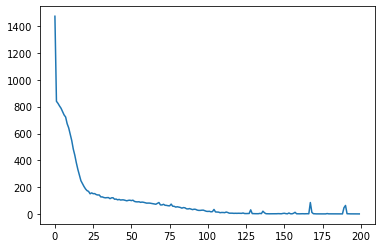

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(8,)),
    tf.keras.layers.Normalization(),
    tf.keras.layers.Dense(units=128, activation=tf.nn.relu),
    tf.keras.layers.Dense(units=128, activation=tf.nn.relu),
    tf.keras.layers.Dense(units=128, activation=tf.nn.relu),
    tf.keras.layers.Dense(units=128, activation=tf.nn.relu),
    tf.keras.layers.Dense(units=3,)
                             ])

model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.0001))

history = model.fit(cp_features, cp_labels, epochs=200, verbose=1)

print("Finished training the model")
plt.plot(history.history['loss'])
print(history.history['loss'][-1])



In [ ]:
# print(tf.__version__)

In [9]:
def get_file_size(file_path):
    size = os.path.getsize(file_path)
    return size

In [10]:
def convert_bytes(size, unit=None):
    if unit == "KB":
        return print('File size: ' + str(round(size/1024,3)) + ' Kilobytes')
    elif unit == "MB":
        return print('File size: ' + str(round(size/(1024*1024),3)) + ' Megabytes')
    else:
        return print('File size: ' + str(size) + 'bytes')

In [11]:
Keras_Model_name = "tf_model.h5"
model.save(Keras_Model_name)
convert_bytes(get_file_size(Keras_Model_name), "MB")


File size: 0.635 Megabytes


In [12]:
tf_lite_model_file_name = model_name
tf_lite_converter = tf.lite.TFLiteConverter.from_keras_model(model)
tf_lite_model = tf_lite_converter.convert()
name = tf_lite_model_file_name
open(name, 'wb').write(tf_lite_model)
convert_bytes(get_file_size(tf_lite_model_file_name), 'KB')


File size: 202.699 Kilobytes


2022-07-08 13:59:56.496612: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2022-07-08 13:59:56.496648: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2022-07-08 13:59:56.497207: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: /tmp/tmpl9sn9jrg
2022-07-08 13:59:56.498496: I tensorflow/cc/saved_model/reader.cc:81] Reading meta graph with tags { serve }
2022-07-08 13:59:56.498513: I tensorflow/cc/saved_model/reader.cc:122] Reading SavedModel debug info (if present) from: /tmp/tmpl9sn9jrg
2022-07-08 13:59:56.504439: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled
2022-07-08 13:59:56.505512: I tensorflow/cc/saved_model/loader.cc:228] Restoring SavedModel bundle.
2022-07-08 13:59:56.563441: I tensorflow/cc/saved_model/loader.cc:212] Running initialization op on SavedModel bundle at path: /tmp/tmpl9sn9jrg
2022-07

In [ ]:
interpreter = tf.lite.Interpreter(model_path=name)
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print('Input shape: ', input_details[0]['shape'])
print('Input type: ', input_details[0]['dtype'])
print('Output shape: ', output_details[0]['shape'])
print('Output type: ', output_details[0]['dtype'])

In [ ]:
# test_data = cp_labels

# interpreter.set_tensor(input_details[0]['index'], test_data)
# interpreter.invoke()
# test_ans = interpreter.get_tensor(output_details[0]['index'])
# prediction_classes = np.argmax(test_ans, axis=1)
# acc = accuracy_score(prediction_classes, cp_features)


In [ ]:
# model.evaluate(cp_features, cp_labels)
# module_no_signatures_path = os.path.join(tmpdir, 'module_no_signatures')
# module(tf.constant(0.))
# print('Saving model...')
# tf.saved_model.save(module, module_no_signatures_path)